# Doğrusal olmayan ayrılabilir veri için SVM Sınıflandırıcısı

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. "XOR" veri setimizi oluşturalım

Bu tür doğrusal olmayan ayrılabilir bir veri setini sınıflandırmayı deneyelim

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/non-linear-dataset.png" width=450>

Bu amaçla, [mantıksal XOR kapıları](https://en.wikipedia.org/wiki/XOR_gate) kullanarak 2D bir veri seti oluşturacağız

Aşağıdaki hücrelerde `np.logical_xor` ile oynayarak bunun nasıl çalıştığını anlamaya çalışın:

In [2]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

False
True
False


In [3]:
np.logical_xor([True, True, False], [True, False, False])

array([False,  True, False])

Şimdi aşağıdaki kurala sahip sentetik 2D veri setimizi oluşturalım: 

$$ y = 
\begin{cases}
    1 & \text{eğer } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{aksi durumda}
\end{cases}
$$


In [4]:
# Number of datapoints
n = 500
noise = 0.2

Text(0, 0.5, 'X2')

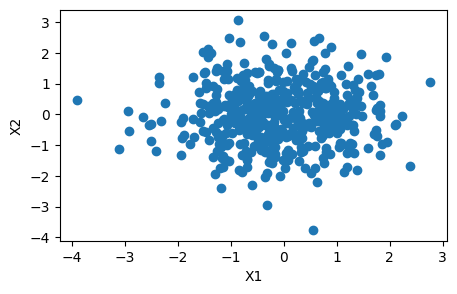

In [5]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")


In [6]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [7]:
# Then, build our binary class y
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)

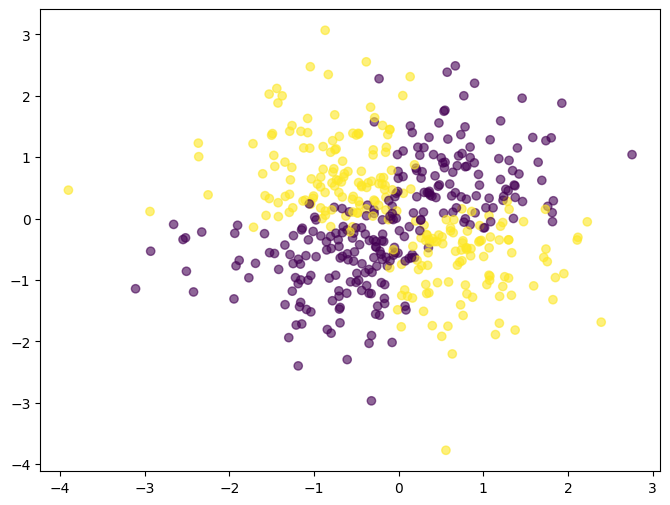

In [8]:
# We have re-created the XOR quadrant!
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Doğrusal SVM

_Destek Vektör Makinesi (SVM)_'ne hoş geldiniz 🎉

Doğrusal SVM sınıflandırıcısının amacı en iyi **w** vektörünü bulmaktır

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/hyperplane.png" width=500>

- yönü karar sınırı hiperplanını benzersiz bir şekilde belirler
- ve aykiri değerler için mentepe kayiplarinin toplamini minimize eder

👉 **w** `.fit()` sırasında öğrenilen tüm model parametrelerini içerir  
👉 `C` **yanlış** sınıflandırma ile ilişkili **maliyet**tir

___
❓ Tüm veri seti üzerinde `C` = 1 değeri ile **doğrusal** SVC sınıflandırıcısı eğitin. 

In [9]:
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)


SVC(C=1, kernel='linear')

❓ `utils/plots.py` içinde size verilen `plot_decision_regions` fonksiyonunu kullanarak modelinizin karar sınırlarını görselleştirin

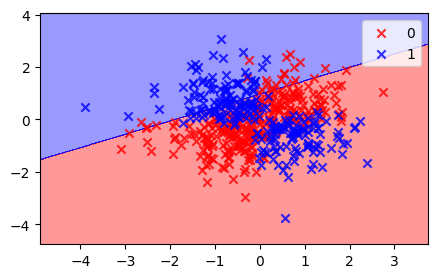

In [10]:
from utils.plots import plot_decision_regions
#help(plot_decision_regions)
plot_decision_regions(X, y, clf)


❓ Bu model için "tahmin ettiğiniz" doğruluk skorunu (yaklaşık olarak) aşağıya kaydedin 

In [11]:
linear_svm_score = clf.score(X, y)
print(f"Predicted accuracy score: {linear_svm_score}")

Predicted accuracy score: 0.618


❓ Bu durumda `C` değerinin herhangi bir önemi olduğunu düşünüyor musunuz?

<details><summary>Cevap</summary>
    
☝️ Doğrusal SVM sınıflandırıcıları, yanlış sınıflandırılan veri noktalarına uygulanan maliyet `c` ne olursa olsun, veri noktalarını her zaman düz bir çizgi ile ayırır. Veri setine yapısal olarak yanlış model tipini uydurmaya çalışıyoruz.

</details>

❓ Lojistik Regresyon daha iyi performans gösterir mi düşünüyorsunuz? Denemekten çekinmeyin.

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)
log_reg.fit(X, y)



LogisticRegression(max_iter=1000)

🧪 Kodunuzu test edin

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_svm',
    linear_svm_score=linear_svm_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D5-S-data-svm/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_linear_svm.py::TestLinearSvm::test_score PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/linear_svm.pickle

git commit -m 'Completed linear_svm step'

git push origin master



## 3. Çekirdek SVM 🔥

📚 İlk olarak, **bugünkü dersin 5. bölümünü (Çekirdekler) dikkatle okuyun**. Acele etmeyin, bu zorluk görevinin bir parçasıdır

❓Kendi kelimelerinizle, Çekirdek nedir - bir cümle ile?

<details>
    <summary>Olası bir cevap</summary>

SVM modellerinde sınıflandırma için kullanılan noktalar arasındaki "benzerlik" ölçüsüdür (yüksek benzerliğe sahip iki nokta benzer şekilde sınıflandırılır)
</details>

In [14]:
kernel_definition = "Kernel is a technique that is used in SVM to transform non-linear data into higher dimensional ones."
kernel_definition

'Kernel is a technique that is used in SVM to transform non-linear data into higher dimensional ones.'

❓Aşağıda 4 farklı çekirdeği isimlerini belirtin

<details>
    <summary>Olası bir cevap</summary>

- Doğrusal (Linear)
- Polinom (Polynomial)
- Radyal Taban Fonksiyonu (rbf)
- Sigmoid
</details>

In [15]:
lin = "Linear"
poly = "Polynomial"
rbf = "Radial Base Function"
sig = "Sigmoid"

## 3.2 Polinom Çekirdekleri

2. derece polinom çekirdeği aşağıdaki gibidir 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

Çekirdeği değiştirerek, _benzerlik_ kavramımızı değiştirdik: doğrusal çekirdek için nokta çarpımı ("kosinüs benzerliği") ile noktaların ne kadar yakın olduğunu ölçmek yerine, **noktaların birbirine göre bir daire içinde olup olmadığına** dayalı benzerlik ölçüyoruz. 

Bu, aşağıdaki gibi yeni karesel özelliklerin oluşturulmasına **eşdeğer**dir (Çekirdek Hileşi)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Sezgisel olarak konuşarak, XOR veri setimizi en iyi şekilde uydurmak için ihtiyaç duyduğumuz minimum çekirdek "derece" sayısı `d` kaçtır? 

<details>
    <summary>Cevap</summary>

`d=2` yeterli olmalıdır çünkü XOR koşulumuz `x1 * x2` polinomundan hesaplanabilir
    
$$    
    sınıf = 
\begin{cases}
    0 & \text{eğer } x_1 x_2 > 0\\
    1 & \text{aksi durumda}
\end{cases}
$$
</details>


❓ "Maksimum marğ sınıflandırıcısı"nı görselleştirmek için `C = 100` değerini yeterince büyük tutarak, 2. derece SVM `poly` eğitin ve çizin

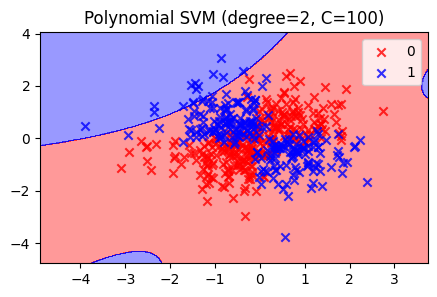

In [16]:
svm_poly = SVC(kernel="poly", 
               C=100
              )

svm_poly.fit(X, y)

plot_decision_regions(X, y, svm_poly)
plt.title("Polynomial SVM (degree=2, C=100)")
plt.show()

❓ Bu XOR veri setinin nasıl tasarlandığını bildiğiniz göz önüne alınarak, svm'inizin performansını en iyi hangi sıfatlar tanımlar?

In [17]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"


poly_svm_performance = b,d # [?] # fill the list with the answer(s)


🧪 Kodunuzu test edin

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('poly_svm',
    poly_svm_performance=poly_svm_performance)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D5-S-data-svm/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_poly_svm.py::TestPolySvm::test_performance PASSED                   [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/poly_svm.pickle

git commit -m 'Completed poly_svm step'

git push origin master



❓ Hala ikna olmadınız mı? Aşağıdaki modeli eğiterek polinom çekirdeğinin polinom özelliklerine sahip olmakla eşdeğer olduğunu iki kez kontrol edebilirsiniz:

- İlk adım olarak polinom özellikleri oluşturuyoruz (özellik mühendisliği)
- ve ardından doğrusal bir SVM eğitiyoruz.

(Pipeline'ların sözdizimi konusunda endişelenmeyin, pipeline'lar hakkında bir sonraki derste daha fazlasını göreceğiz! 🔥)

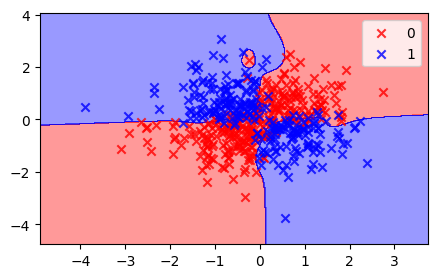

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = 6

equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Matematiksel olarak eşdeğer olmasına rağmen, bu manuel özellik mühendisliği çekirdek hilesin’den çok daha fazla hesaplama gücü gerektirir ve daha yüksek boyutlulukla ölçeklenmez!

### Aylar veri seti

Şimdi sınıflandırması daha zor bir veri seti ile deneyelim!

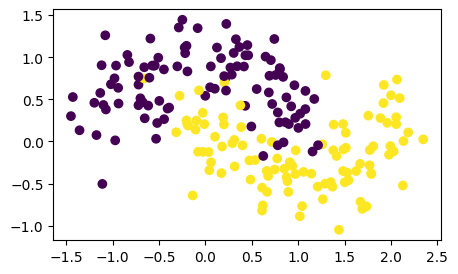

In [20]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Bu veri setine bir polinom SVM çekirdeği uydurmayı deneyin 

`C`, `degree` ve `coef0` değerlerini değiştirerek aşağıda **görsel olarak** deneyin.

`coef0`, $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$ formülünde $c$'nin rolünü oynar
- 0'a eşit olduğunda, sadece d-inci derece polinom özelliklerine erişiminiz vardır
- Ne kadar yüksekse, modeliniz o kadar çok düşük derece özellikleri dikkate alır

In [21]:
from ipywidgets import interact # pip install ipywidgets if you haven't done it already

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️ Polinom çekirdeği, derece yeterince yüksek olduğu sürece hemen hemen her şeyi uydurabili r.  

Ancak, çok yüksek dereceli polinom çekirdeklerinin modelleri aşırı öğrenmeye eğilimli hale getireceğini unutmayın!


## 3.3 RBF - Radyal Taban Fonksiyonu Çekirdeği (gaussian olarak da bilinir)

RBF Çekirdeği geliyor! 
SVM için hemen hemen vazgeçilmez çekirdek (ve sklearn'de varsayılan olan).   

Çeşitli problemlere karşı çok sağlam olduğunu kanıtlar ve polinomdan daha kolay ayarlanır, çünkü sadece çekirdek hiper-parametresi `gamma` $\gamma$'nın grid arama yapmayı gerektirir, tabii ki `C`'nin üstünde

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- İki nokta arasındaki öklidyen mesafe ne kadar büyük olursa $||\textbf{a}-\textbf{b}||^2$, çekirdek fonksiyonu sıfıra o kadar yakın olur. Bu, birbirinden uzak iki noktanın farklı olma olasılığının daha yüksek olduğu anlamına gelir.

- `gamma` $\gamma$ her bir örneğin diğerleri üzerindeki etki aralığını azaltır (**miyopi**). Daha güçlü $\gamma$ değerleri, modelinizi küçük ölçekli düzensizliklere "fazla yakından" bakarak aşırı öğrenmeye sevk eder

- `C` hala marğın **sertliğini** kontrol eder. Daha güçlü değerler modelinizi aşırı öğrenmeye sevk eder.

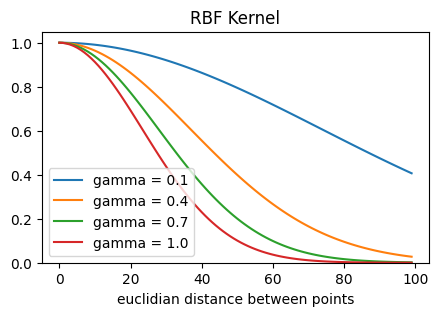

In [22]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ RBF çekirdeği ile SVM sınıflandırıcısını eğitin ve karar bölgelerini çizin

- Çok düşük varyansli bir model ile başlayın (örn: `gamma=0.01` ve `C=0.1`)
- Açık aşırı öğrenme gözlemleyene kadar `gamma`yı artırın. Grafikte açıkça görülebilir olmalıdır. 

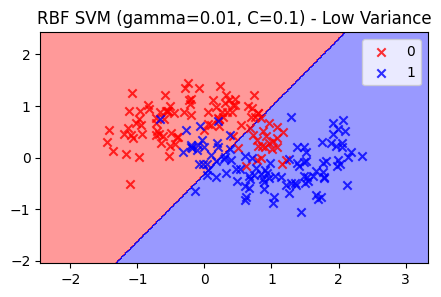

In [25]:
svm_rbf = SVC(
               kernel="rbf", 
               gamma=0.01,
               C=0.1
              )

svm_rbf.fit(X, y)

plot_decision_regions(X, y, svm_rbf)
plt.title("RBF SVM (gamma=0.01, C=0.1) - Low Variance")
plt.show()

❓ Şimdi, gamma'nın en iyi tahmin ettiğiniz değerini kullanın (örneğin `gamma=1`) ve bu sefer aşırı öğrenene kadar `C`'yi artırın


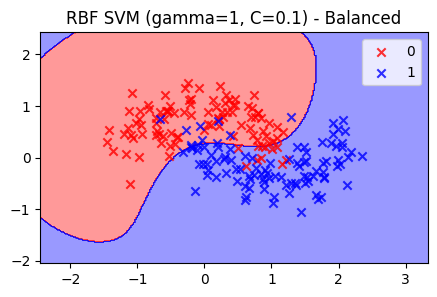

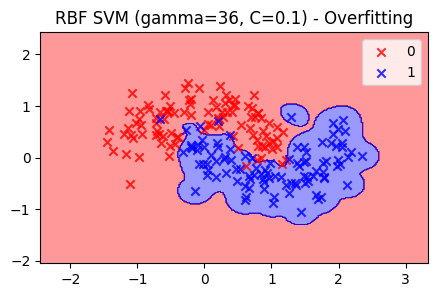

In [31]:
svm_rbf_upt = SVC(
               kernel="rbf", 
               gamma=1,
               C=0.1
              )

svm_rbf_upt.fit(X, y)

plot_decision_regions(X, y, svm_rbf_upt)
plt.title("RBF SVM (gamma=1, C=0.1) - Balanced")
plt.show()

svm_rbf_over = SVC(
               kernel="rbf", 
               gamma=36,
               C=0.1
              )

svm_rbf_over.fit(X, y)

plot_decision_regions(X, y, svm_rbf_over)
plt.title("RBF SVM (gamma=36, C=0.1) - Overfitting")
plt.show()



☝️ Yukarıdaki gibi `@interact` kullanarak kendi interaktif grafiğinizi oluşturmaktan çekinmeyin ve en iyi `C` ve `gamma`yı "görsel olarak" bulmaya çalışın

In [32]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro…

❓ `C` ve `gamma` için en iyi görsel tahmin değerlerinizi aşağıda saklayın (onluk kuvvetlerine yuvarlanmış: 0.1, 1, 10, 100 ...)

In [33]:
best_c = 100 #?
best_gamma = 0.1  #?

🧪 Kodunuzu test edin

In [34]:
from nbresult import ChallengeResult
result = ChallengeResult('rbf_svm',
                         best_c=best_c,
                         best_gamma=best_gamma)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D5-S-data-svm/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_rbf_svm.py::TestRbfSvm::test_hyperparams PASSED                     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/rbf_svm.pickle

git commit -m 'Completed rbf_svm step'

git push origin master



## 3.4 Sigmoid çekirdeği

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

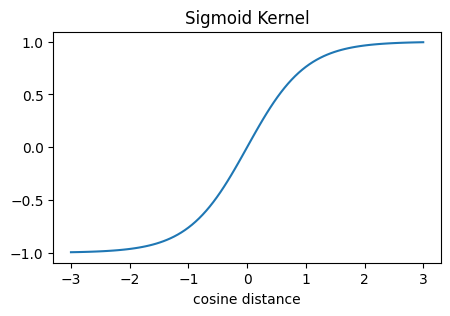

In [37]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ Sigmoid çekirdeği, doğrusal çekirdekte kullanılan "kosinüs benzerliği"ni [-$\gamma$,+$\gamma$] aralığına sıkıştırır.

❓ Sigmoid çekirdeği ile modelinizi **görsel olarak** ince ayar yapmaya çalışın, şunlar için kaba tan eli arama yapın
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

`@interact` dekoratörünü `plot_decision_regions` fonksiyonu ile birlikte kullanarak

In [38]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️ Görsel olarak çalıştırmak kolay değil, değil mi? Otomatik GridSearch zamanı!

## 4. En iyi çekirdeği Grid Search ile bulun

❓ En iyi `kernel` ve en iyi çekirdek hiper-parametreleri için aynı anda `RandomizedSearchCV` yapın (uyarı: scikit-learn polinom çekirdeklerini diğerleriyle aynı anda grid araması yaparken sorun yaşar)
 
Denemek için mantıklı değer aralıkları tanımlamak için yukarıdaki görsel sezgilerinizi kullanın

In [40]:
from sklearn.model_selection import RandomizedSearchCV


svm = SVC()
param_distributions = [
   
    {
        "kernel": ["linear"],
        "C": [0.01, 0.1, 1, 10, 100]
    },
   
    {
        "kernel": ["rbf"],
        "C": [0.1, 1, 10, 100],
        "gamma": [0.01, 0.1, 1, 10, 50]
    },
 
    {
        "kernel": ["poly"],
        "degree": [2, 3],
        "C": [0.1, 1, 10, 100],
        "gamma": [0.01, 0.1, 1]
    }
]

rscv = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42
)

rscv.fit(X, y)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions=[{'C': [0.01, 0.1, 1, 10, 100],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10, 100],
                                         'gamma': [0.01, 0.1, 1, 10, 50],
                                         'kernel': ['rbf']},
                                        {'C': [0.1, 1, 10, 100],
                                         'degree': [2, 3],
                                         'gamma': [0.01, 0.1, 1],
                                         'kernel': ['poly']}],
                   random_state=42, scoring='accuracy')

❓ En iyi modelinizin karar sınırlarını çizin

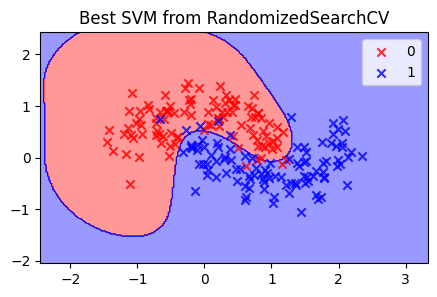

In [42]:
best_svm = rscv.best_estimator_

from utils.plots import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X, y, best_svm)
plt.title("Best SVM from RandomizedSearchCV")
plt.show()


❓ Doğruluğunu 5 katlı çapraz doğrulama ile değerlendirin ve ortalama sonuçunuzu `best_svm_cv_accuracy` olarak saklayın

In [43]:
best_svm_cv_accuracy = rscv.best_score_
best_svm_cv_accuracy


0.9399999999999998

🧪 Kodunuzu test edin

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('sigmoid_svm',
    best_svm_cv_accuracy=best_svm_cv_accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D5-S-data-svm/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_sigmoid_svm.py::TestSigmoidSvm::test_accuracy PASSED                [100%]

============================== 1 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/sigmoid_svm.pickle

git commit -m 'Completed sigmoid_svm step'

git push origin master



## 5. Genelleme

❓ Buluttaki uygulamada "produksiyon"a koymak için `best_svm` modelinizi seçin. Yarım ay veri setine uydurun.

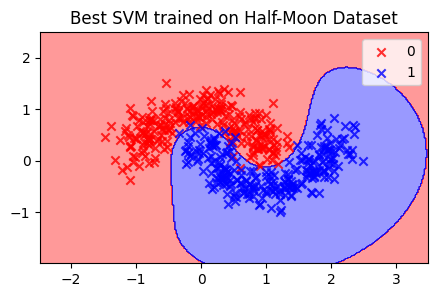

In [45]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(
    n_samples=500,
    noise=0.2,
    random_state=42
)
best_svm.fit(X_moon, y_moon)


plot_decision_regions(X_moon, y_moon, best_svm)
plt.title("Best SVM trained on Half-Moon Dataset")
plt.show()

Birkaç gün sonra, model daha önce hiç görmediği yeni veri noktalarını aldı ve tahmin etti (bizim "test setimiz")

In [46]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ `test_idx`'i isteğe bağlı argüman olarak içeren `plot_decision_regions` yaparak performansını görselleştirin.  
Kaç tane yanlış sınıflandırılmış test örneği aldığınızı sayın!

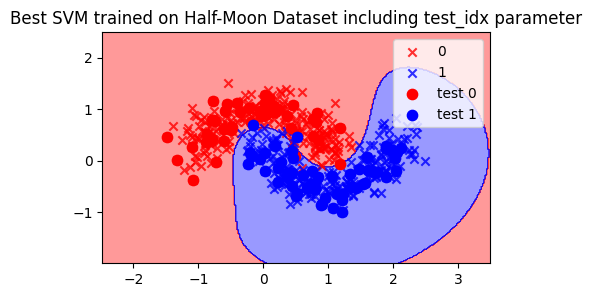

In [47]:
plot_decision_regions(X_moon, y_moon, best_svm,test_idx)
plt.title("Best SVM trained on Half-Moon Dataset including test_idx parameter")
plt.show()

In [48]:
number_misclassified_test = 2

In [49]:
from nbresult import ChallengeResult

result = ChallengeResult('generalization',
    number_misclassified_test=number_misclassified_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D5-S-data-svm/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_generalization.py::TestGeneralization::test_number_misclassified PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/generalization.pickle

git commit -m 'Completed generalization step'

git push origin master



## 6. kNN vs. SVM ?

Böyle doğrusal olmayan bir problem KNN sınıflandırıcısına da iyi uyabilir.
En iyi K'yı görsel olarak bulmaya çalışın ve davranışını SVM ile karşılaştırın.

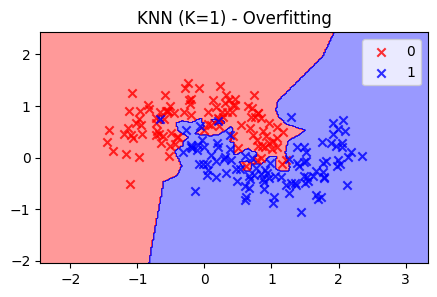

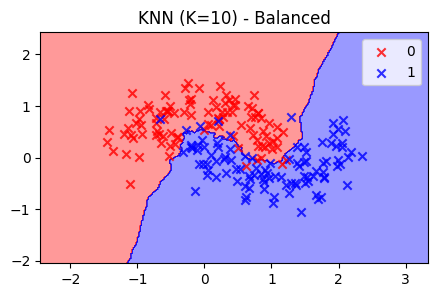

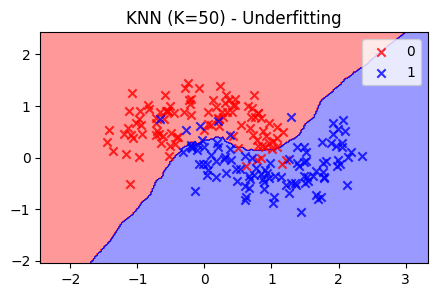

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X, y)

plot_decision_regions(X, y, knn_k1)
plt.title("KNN (K=1) - Overfitting")
plt.show()


knn_k10 = KNeighborsClassifier(n_neighbors=10)
knn_k10.fit(X, y)

plot_decision_regions(X, y, knn_k10)
plt.title("KNN (K=10) - Balanced")
plt.show()

knn_k50 = KNeighborsClassifier(n_neighbors=50)
knn_k50.fit(X, y)

plot_decision_regions(X, y, knn_k50)
plt.title("KNN (K=50) - Underfitting")
plt.show()


🏁 Tebrikler! Notebook'unuzu **commit** ve **push** etmeyi unutmayın